**SCRATCH - NOT READY FOR USE**

---
#**Introduction to Machine Learning for Computer Vision**

In the past 20 years, ***Machine Learning*** (ML) algorithms based on ***Artificial Neural Networks*** (ANNs) have emerged as the best solutions for important ***Computer Vision*** (CV) problems like image classification, segmentation, localization, etc. Therefore, now, ANNs are an essential tool for CV.

This set of python notebooks is intended to give the readers practical examples of basic ANN concepts such as ***gradient descent***, ***backpropagation***, ***multilayer perceptrons*** (MLP) and ***convolutional neural networks*** (CNNs). 

We hope that it can be a supplementary study material for beginners, offering a gentle introduction to the subject but yet giving enough understanding of what is going on behind the scenes.

There are four notebooks in this series:

 1. Gradient Descent
 1. Multilayer Perceptron
 1. Simple Neural Network Framework (SNN)
 1. Convolutional Neural Networks


<br></br>
***Prerequisites***

It is desirable the readers are familiar with python and some basic concepts of infinitesimal calculus.


---
##**Importing basic libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

import matplotlib
print("")
print("Matplotlib version")
print('{}'.format(matplotlib.__version__))


Python version
3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
Version info.
sys.version_info(major=3, minor=7, micro=13, releaselevel='final', serial=0)

Matplotlib version
3.2.2


---
##**Utility functions for visualization**

In [ ]:
class Utils:

  #definindo parametros globais
  PLOT_SX = 6 # tamanho do display em X
  PLOT_SY = 6 # tamanho do display em Y
  PLOT_FC_COLOR = 'w'  # cor de fundo branca


  #visualiza uma matriz 2d de rgb
  def drawImageRGB (img, title=''):
    plt.figure(figsize=[Utils.PLOT_SX, Utils.PLOT_SY], facecolor=Utils.PLOT_FC_COLOR)
    plt.title(title)
    plt.imshow(img)
    plt.show()


  #visualiza um atributo associado a uma escala de cores
  def drawImageAttr (img, title='', vmin=None, vmax=None, cmap="gray", colorbar=False, interpolation=None, norm=None):
    plt.figure(figsize=[Utils.PLOT_SX,Utils.PLOT_SY], facecolor=Utils.PLOT_FC_COLOR)
    plt.title(title)
    plt.imshow(img,cmap,vmin=vmin,vmax=vmax,interpolation=interpolation, norm=norm)
    if colorbar:
      plt.colorbar()
    plt.show()


  #visualiza uma matriz 2d de rgb em um eixo de subplot
  def drawImageRGB_grid(eixo, img, xlim=None, title=None, interpolation=None, aspect=None):
    eixo.set_title(title)
    eixo.imshow(img,interpolation=interpolation,aspect=aspect)
    eixo.set_xlim(xlim)


  #visualiza um atributo associado a uma escala de cores
  def drawImageAttr_grid (eixo, img, vmin=None, vmax=None, title='', cmap="gray", colorbar=False, interpolation=None, norm=None, aspect=None):
    eixo.set_title(title)
    img = eixo.imshow(img, cmap, vmin=vmin, vmax=vmax, interpolation=interpolation, norm=norm, aspect=aspect)
    if colorbar:
      plt.colorbar(img, ax=eixo)

  # Desenha o histograma de um array com controle total na geracao dos bins.
  def hist (v, bins, title="histogram"):
    plt.figure(figsize=(Utils.PLOT_SX*2,Utils.PLOT_SY))
    plt.title(title)
    n,b,p=plt.hist(v,bins)
    plt.xlim( [ bins.min(), bins.max()])
    plt.show()
    return n,b,p


  # Desenha o histograma de um array, dentro de um grid, com controle total na geracao dos bins.
  def hist_grid (eixo, v, bins, title="histogram"):
    h, b = np.histogram(v,bins)           #calcula histogram
    centers = np.zeros(h.shape[0])        # calcula o centro de cada bin
    for i,val in enumerate(bins[:-1]):
      centers[i] = (val + bins[i+1]) / 2
    eixo.set_title(title)
    #eixo.plot(centers,h)                  #desenha a funcao
    eixo.fill_between(centers,h)          #preenche a parte debaixo da curva
    eixo.set_xlim( [centers.min(), centers.max()] )
    return h,bins


  # Desenha o histograma de uma array. Os bins são gerados automaticamente a partir de v.min e v.max.
  def hist2 (v, nbins, lim, title="histogram"):
    plt.figure(figsize=(Utils.PLOT_SX*2,Utils.PLOT_SY))
    plt.title(title)

    #para forçar os limites exatos dos bins
    #n,bins,patches=plt.hist(v,nbins,range=lim)

    #para deixar os limites dos bins serem definidos a partir de v.min e v.max
    n,bins,patches=plt.hist(v,nbins)
    plt.xlim(lim)
    plt.show()
    return n,bins,patches


  def drawFunction_grid(eixo, x,ys, title=None, cores=None, fill=False, lw=None, xscale=True):

    multiplo = False 
    if ys.ndim > 1:
      multiplo = True
      fill = False    # se forem mais linhas, nao desenhar com fill

    if cores is not None:
      if multiplo:
        assert(len(cores) == ys.shape[0])
      else:
        assert(len(cores) == 1)
    else:
      if multiplo:
        cores = ["black"] * ys.shape[0]
      else:
        cores = [ "black" ]

    if not multiplo:
      linhas = np.reshape(ys, (1, ys.shape[0]))
    else:
      linhas = ys

    eixo.set_title(title)

    for l,c in list(zip(linhas,cores)):
      if fill:
        eixo.fill_between(x,l)
      else:
       eixo.plot(x, l, c, lw=lw)

    if xscale:
      eixo.set_xlim(x.min(), x.max())


  def drawFunction(x,ys, title=None, cores=None, fill=False, lw=None):

    multiplo = False 
    if ys.ndim > 1:
      multiplo = True
      fill = False    # se forem mais linhas, nao desenhar com fill

    if cores is not None:
      if multiplo:
        assert(len(cores) == ys.shape[0])
      else:
        assert(len(cores) == 1)
    else:
      if multiplo:
        cores = ["black"] * ys.shape[0]
      else:
        cores = [ "black" ]

    if not multiplo:
      linhas = np.reshape(ys, (1, ys.shape[0]))
    else:
      linhas = ys

    plt.title(title)

    for l,c in list(zip(linhas,cores)):
      if fill:
        plt.fill_between(x,l)
      else:
       plt.plot(x, l, c, lw=lw)

    plt.xlim(x.min(), x.max())


  def getMinMax(v):
    return np.min(v), np.max(v) 


  # cria uma nova imagem com a luminância
  def lum(img):
    return np.dot(img,[0.2126,0.7152,0.0722])


  def printImageInfo(img,title=None):
    if title is not None:
      print("----------- [", title, "] -------------------")
    else:
      print("------------ [ IMAGE INFO ] -------------------")
    print("[ SHAPE ]", img.shape)
    tp = img.dtype
    if img.ndim == 3:
      nc = img.shape[2]
    else:
      nc = 1
    h = img.shape[0]
    w = img.shape[1]
    print (f'[ DIMENSÕES ] w={w}, h={h}, numero de canais de cor = {nc}')
    print (f'[ CARACTERÍSTICAS ] dtype = {tp}, min={np.amin(img)}, max={np.amax(img)}, median={np.median(img)}')
    print("-----------------------------------------------")


  def printMessage(msg):
    print("---------------------------------------------------")
    print(msg)
    print("---------------------------------------------------")



---
#**Chapter 1 - Gradient Descent**


TODO - ACHO MELHOR RETIRAR ESSE PARÁGRAFO DA WIKIPEDIA DAQUI E INSERIR NA HORA DE FALAR SOBRE GD

"*In mathematics, gradient descent (also often called steepest descent) is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent.*" -- [Wikipedia](https://en.wikipedia.org/wiki/Gradient_descent)



In order to understand the gradient descent method, we will go through some basic concepts, starting with ***linear regression***, then ***least squares method***, and finally see examples of the gradient descent itself.


##**Linear Regression**

Linear regression is a method to predict the relationsheep between two variables by fitting a straight line to the observed data.

The data can be represented by a set $X$ of **input values**
$$X = \{x_1, x_2, ..., x_n\}$$ 
and a set $Y$ of **output values**
$$Y = \{y_1, y_2, ..., y_n\}$$ 

The **true observed**  relationsheep between the $X$ and $Y$ can be represented as a function $f(x): X \rightarrow Y$, so that $y = f(x)$ <a name="footref-1"></a>[<sup>[1]</sup>](#footnote-1).

In linear regression, our aim is usually to approximate $f(x)$ by a linear function (linear model): $f'(x): \mathbb{R} \rightarrow \mathbb{R}$, so that $y' = wx + b$.






##**Simple example**
Let's start with a simple example. Consider the function bellow:

$$y = \sin(\pi*x) - x^3$$

Our goal is to approximate this function by a third degree polynomial.

We will UnderstanO objetivo deste trabalho é entender o método de gradiente descendente, o método de backpropagation e como usar o pytorch para implemetar essas técnicas.


### **O que deve ser feito**
Implemente o ajuste da função abaixo por um polinômio de grau 3.


 Os coeficientes do polinômio devem ser calculados de três formas distintas:

 - pelo método dos mínimos quadrados derivando a expressão algébria da solução;

 - minimizando a perda quadrática pelo método do Gradiente Descendente, com as derivadas obtidas analiticamente;

 - idem acima usando a função auto grad do PyTorch.

---
#**Método dos Mínimos Quadrados**

*O **Método dos Mínimos Quadrados (MMQ)**, ou Mínimos Quadrados Ordinários (MQO) ou OLS (do inglês Ordinary Least Squares) é uma técnica de otimização matemática que procura encontrar o melhor ajuste para um conjunto de dados tentando minimizar a soma dos quadrados das diferenças entre o valor estimado e os dados observados (tais diferenças são chamadas resíduos).* -- Wikipedia


Esta seção explicará a técnica dos **MMQ** para um caso bastante simples:  
**ajuste de pontos por uma reta**.


---
##**Função de aproximação**

$$y'=wx+b$$

---
##**Função a ser minimizada** 

$$Erro(w,b) = \sum_{i=1}^n(y_i-y_i')^2 = \sum_{i=1}^n(y_i-(wx_i+b))^2$$

---
##**Derivadas da função Erro**
$$\frac{\partial Erro}{\partial w} = \frac{\partial{(\sum_{i=1}^n(y_i-(wx_i+b))^2)}}{\partial w} = \frac{\partial{(\sum_{i=1}^n(y_i-b-wx_i)^2)}}{\partial w} = \\ 2\sum_{i=1}^n(y_i-b-wx_i)(-x_i)$$

<br>
<br>

$$\frac{\partial Erro}{\partial b} = \frac{\partial{(\sum_{i=1}^n(y_i-(wx_i+b))^2}}{\partial b} = \frac{\partial{(\sum_{i=1}^n(y_i-b-wx_i)^2)}}{\partial w} = \\ 2\sum_{i=1}^n(y_i-b-wx_i)(-1)$$

---
##**Calculando a fórmula analítica dos parâmetros w e b**

### Fazendo $\frac{\partial{Erro}}{\partial{w}}=0$,

$$\frac{\partial Erro}{\partial w} = 0  \Leftrightarrow 
2\sum_{i=1}^n(y_i-b-wx_i)(-x_i) = 0 \Leftrightarrow
-\sum_{i=1}^nw_iy_i + b\sum_{i=1}^nx_i + w\sum_{i=1}^nx_i^2= 0$$ 



### Fazendo $\frac{\partial{Erro}}{\partial{b}}=0$, 

$$\frac{\partial Erro}{\partial b} = 0  \Leftrightarrow 
2\sum_{i=1}^n(y_i-b-wx_i)(-1) = 0 \Leftrightarrow
-\sum_{i=1}^ny_i + bn + w\sum_{i=1}^nx_i= 0$$ 


### Sistema equivalente
$$
 \begin{vmatrix}
  \sum_ix_i^2 &  \sum_ix_i \\
  \sum_ix_i &  n \\
 \end{vmatrix} 
 \begin{vmatrix}
w  \\
b 
\end{vmatrix}
=
 \begin{vmatrix}
\sum_ix_iy_i \\
\sum_iy_i \\
\end{vmatrix}
$$


### Expressão algébrica de w

$$
w = \frac{n\sum_ix_iy_i - \sum_ix_i\sum_iy_i}{n\sum_ix_i^2 - \sum_ix_i\sum_ix_i}
$$



### Expressão algébrica de b

$$
b= \frac{\sum_iy_i\sum_ix_i^2 - \sum_ix_i\sum_ix_iy_i}{n\sum_ix_i^2 - \sum_ix_i\sum_ix_i}
$$





---------------------------------------------------
Modelo de (w,b) com rand=20 : w=75.95295291633313, bias=11
---------------------------------------------------
---------------------------------------------------
Funcao que minimiza o erro quadrático : w=74.93351198689787, bias=10.567848240764512
---------------------------------------------------


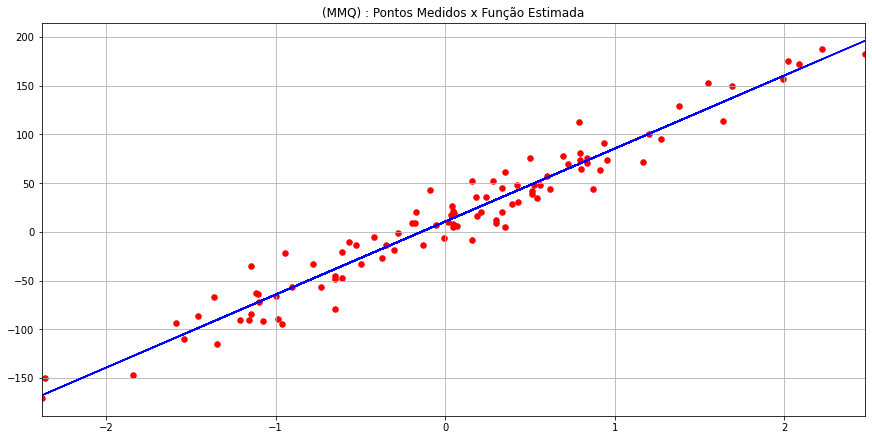

In [ ]:

# Criando classe que implementa o método
class MMQ:

  def f(self, X, w, b):
    return w*X + b

  def fit(self, X, y):
    n = len(X)
    assert n == len(y), "X e y devem ter tamanhos iguais. len(X) = " +str(n) + "len(y) = " + str(len(y))

    sum_xy = np.sum(X*y)
    sum_x = np.sum(X) 
    sum_y = np.sum(y)
    sum_x2 = np.sum(X*X) 

    w = (n*sum_xy - sum_x*sum_y) / (n*sum_x2 - sum_x*sum_x)
    b = (sum_y*sum_x2 - sum_x*sum_xy) / (n*sum_x2 - sum_x*sum_x)

    return w,b


from sklearn import datasets
bias_gab = 11
# gerando dados obervados em torno de um reta
X,y,coef = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4, coef=True, bias=bias_gab)

# Ajustando o conjunto de pontos
mmq = MMQ()
w,b = mmq.fit(X[:,0],y)

Utils.printMessage(f'Modelo de (w,b) com rand=20 : w={coef}, bias={bias_gab}')
Utils.printMessage(f'Funcao que minimiza o erro quadrático : w={w}, bias={b}')

fy = mmq.f(X[:,0], w, b)

fig = plt.figure(figsize=(Utils.PLOT_SX*2,Utils.PLOT_SY), constrained_layout=True)
gs = fig.add_gridspec(1, 1)
ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(X[:,0], y, color='r', marker='o', s=30) 
Utils.drawFunction_grid(ax1, X[:,0], fy, cores='b')
plt.grid(True)
plt.title("(MMQ) : Pontos Medidos x Função Estimada")
plt.show()

---
#**Método dos Mínimos Quadrados - Senóide aproximada por um polinômio de grau 3**

---
##**Função original**

$$y = \sin(\pi*x) - x^3$$

---
##**Função de aproximação**

$$y' = a + bx + cx^2 + dx^3$$

---
##**Função a ser minimizada** 

$$Erro(a,b,c,d) = \sum_{i=1}^n(y_i-y_i')^2 = \sum_{i=1}^n(y_i'-y_i)^2 = \sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)^2$$

---
##**Derivadas da função Erro**
$$
\frac{\partial Erro}{\partial a} = \frac{\partial{(\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)^2)}}{\partial a} = \\ 2\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)
$$

<br>
<br>

$$
\frac{\partial Erro}{\partial b} = \frac{\partial{(\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)^2)}}{\partial b} = \\ 2\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)(x_i)
$$

<br>
<br>

$$
\frac{\partial Erro}{\partial c} = \frac{\partial{(\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)^2)}}{\partial c} = \\ 2\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)(x_i^2)
$$

<br>
<br>

$$
\frac{\partial Erro}{\partial d} = \frac{\partial{(\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)^2)}}{\partial d} = \\ 2\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)(x_i^3)
$$

---
##**Calculando a fórmula analítica dos parâmetros a, b, c e d**

### Fazendo $\frac{\partial{Erro}}{\partial{a}}=0$,

$$
\frac{\partial Erro}{\partial a} = 0  
\Longleftrightarrow 
2\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i) = 0 
\\ \Longleftrightarrow 
\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i) = 0 
$$


### Fazendo $\frac{\partial{Erro}}{\partial{b}}=0$,

$$
\frac{\partial Erro}{\partial b} = 0  
\Longleftrightarrow 
2\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)(x_i) = 0 
\\ \Longleftrightarrow 
\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)(x_i) = 0
$$



### Fazendo $\frac{\partial{Erro}}{\partial{c}}=0$,

$$
\frac{\partial Erro}{\partial c} = 0  
\Longleftrightarrow 
2\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)(x_i^2) = 0 
\\ \Longleftrightarrow 
\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)(x_i^2) = 0
$$


### Fazendo $\frac{\partial{Erro}}{\partial{d}}=0$,

$$
\frac{\partial Erro}{\partial d} = 0  
\Longleftrightarrow 
2\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)(x_i^3) = 0 
\\ \Longleftrightarrow 
\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)(x_i^3) = 0
$$


### Sistema equivalente
$$
 \begin{vmatrix}
  n &  \sum_ix_i & \sum_ix_i^2 & \sum_ix_i^3 \\
  \sum_ix_i & \sum_ix_i^2 & \sum_ix_i^3 & \sum_ix_i^4  \\
  \sum_ix_i^2 & \sum_ix_i^3 & \sum_ix_i^4 & \sum_ix_i^5 \\
  \sum_ix_i^3 & \sum_ix_i^4 & \sum_ix_i^5 & \sum_ix_i^6 \\
 \end{vmatrix} 
 \begin{vmatrix}
a  \\
b  \\
c  \\
d
\end{vmatrix}
=
 \begin{vmatrix}
\sum_iy_i \\
\sum_ix_iy_i \\
\sum_ix_i^2y_i \\
\sum_ix_i^3y_i \\
\end{vmatrix}
$$


Uma vez que a função seno é anti-simétrica e centrada em zero, podemos inferir que $a = c = 0$. E, assim, temos o sistema abaixo:

$$
 \begin{vmatrix}
  \sum_ix_i^2 & \sum_ix_i^4 \\
  \sum_ix_i^4 & \sum_ix_i^6 \\
 \end{vmatrix} 
 \begin{vmatrix}
b  \\
d
\end{vmatrix}
=
 \begin{vmatrix}
\sum_ix_iy_i \\
\sum_ix_i^3y_i \\
\end{vmatrix}
$$



### Expressão algébrica de d


$$
d = \frac{n\sum_ix_i^3y_i\sum_ix_i^2 - \sum_ix_i^4\sum_ix_iy_i}
         {\sum_ix_i^6\sum_ix_i^2 - (\sum_ix_i^4)^2}
$$


### Expressão algébrica de b


$$
b = \frac{\sum_ix_iy_i-d\sum_ix_i^4}
         {\sum_ix_i^2}
$$

---------------------------------------------------
[ COEFICIENTES ] a=0.00, b=2.67, c=-0.00, d=-3.84
---------------------------------------------------
---------------------------------------------------
[ POLINÔMIO ] 0.00 + (2.67 * x) + (-0.00 * x^2) + (-3.84 * x^3)
---------------------------------------------------
---------------------------------------------------
[ ERRO ] 0.31724123171248064
---------------------------------------------------


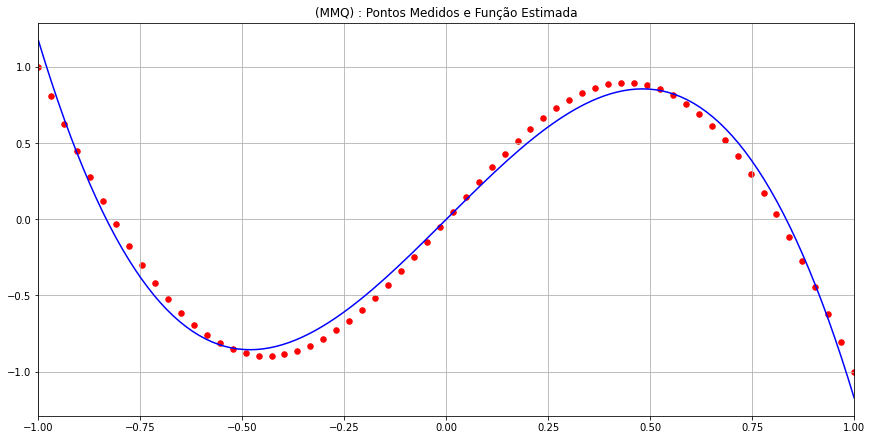

In [ ]:
# Definindo as funções principais

def f_orig(X):
  return np.sin(np.pi*X) - X**3
  #return 40. + X + 20.*X**2 + 10.*X**3


class MMQ_pol3(MMQ): 

    def f(self, X, a, b, c, d):
      return a + b*X + c*X**2 + d*X**3

    def loss(self,X,a,b,c,d):
      y_pred = self.f(X,a,b,c,d)
      return np.sum((y_pred-y)**2)

    def fit(self, X, y):
      n = len(X)
      assert n == len(y), "X e y devem ter tamanhos iguais. len(X) = " +str(n) + "len(y) = " + str(len(y))

      A = np.sum(X)
      B = np.sum(X**2)
      C = np.sum(X**3)
      D = np.sum(X**4) 
      E = np.sum(X**5) 
      F = np.sum(X**6) 

      G = np.sum(y)
      H = np.sum(X*y)
      I = np.sum((X**2)*y)
      J = np.sum((X**3)*y)

      K = (n*B)-(A*A); assert K>0.0001 and n*K>0.001
      L = (A/K)*B*C - (n/K)*C*C - (B/n)*B + D
      M = I - ((B/n)*G) + (C*H*(n/K)) - ((A/K)*G*C) 
      N = ( (B*C)/n ) - E - ((A/K)*C*C) + ((n/K)*C*D) 
      O = (A/(n*K))* B * (n*H - A*G)
      P = L - (A/(n*K))*A*B*B + (A/K)*B*C; assert P>0.0001 and n*P>0.0001
      Q = (A/(n*K))*A*B*C - (A/K)*B*D

      Z1 = (n/K)*H - (A/K)*G 
      Z2 = (A/K)*B - (n/K)*C
      Z3 = (A/K)*C - (n/K)*D 

      R = (A/(n*P))*Z2*Q + (A/n)*Z3 + (B/(n*P))*Q + C/n
      S = G/n - (A/n)*Z1 - (B/(n*P))*(M+O) - (A/(n*P))*Z2*(M+O) 

      T = J - C*S - D*Z1 - (D/P)*Z2*(M+O) - (E/P)*(M+O)
      U = -C*R + (D/P)*Z2*Q + D*Z3 + (E/P)*Q + F

      d = T / U
      c = (M + O + Q*d) / P
      b = Z1 + Z2*c + Z3*d
      a = S-R*d

      return a,b,c,d

# criando nuvem de pontos para y = sin(\pi*x) - x^3

X = np.linspace(-1,1,64)
y = f_orig(X)

mmq = MMQ_pol3()
a,b,c,d = mmq.fit(X,y)
Utils.printMessage(f"[ COEFICIENTES ] a={a:.2f}, b={b:.2f}, c={c:.2f}, d={d:.2f}")
Utils.printMessage(f"[ POLINÔMIO ] {a:.2f} + ({b:.2f} * x) + ({c:.2f} * x^2) + ({d:.2f} * x^3)")
Utils.printMessage(f"[ ERRO ] {mmq.loss(X,a,b,c,d)}")


X_denso = np.linspace(-1,1,128)
#y_pred = f_orig(X_denso)
y_pred = mmq.f(X_denso, a, b, c, d)

fig = plt.figure(figsize=(Utils.PLOT_SX*2,Utils.PLOT_SY), constrained_layout=True)
gs = fig.add_gridspec(1, 1)
ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(X, y, color='r', marker='o', s=30) 
Utils.drawFunction_grid(ax1, X_denso, y_pred, cores='b')
plt.grid(True)
plt.title("(MMQ) : Pontos Medidos e Função Estimada")
plt.show()



---
#**Método Gradiente Descendente (MGD)**

O Método Gradiente Descendente é um método iterativo de busca do mínimo local de uma função na vizinhança de um ponto a partir do conhecimento de suas derivadas. Esse método é adequado para determinação de mínimo locais de uma função sobre a qual conhecemos suas derivadas, mas não conhecemos sua expressão analítica completa.


**Obs.:** A análise realizada nesta seção utilizará as mesmas funções da seção anterior.


---
##**Função original**

$$y = \sin(\pi*x) - x^3$$


---
##**Função de aproximação**

$$y' = a + bx + cx^2 + dx^3$$

---
##**Função a ser minimizada** 

$$Erro(a,b,c,d) = \sum_{i=1}^n(y_i-y_i')^2 = \sum_{i=1}^n(y_i'-y_i)^2 = \sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)^2$$

---
##**Derivadas da função Erro (repetição)**
$$
\frac{\partial Erro}{\partial a} = \frac{\partial{(\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)^2)}}{\partial a} = \\ 2\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)
$$

<br>
<br>

$$
\frac{\partial Erro}{\partial b} = \frac{\partial{(\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)^2)}}{\partial b} = \\ 2\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)(x_i)
$$

<br>
<br>

$$
\frac{\partial Erro}{\partial c} = \frac{\partial{(\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)^2)}}{\partial c} = \\ 2\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)(x_i^2)
$$

<br>
<br>

$$
\frac{\partial Erro}{\partial d} = \frac{\partial{(\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)^2)}}{\partial d} = \\ 2\sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)(x_i^3)
$$

coefs aleatórios =  (4697.299369061022, 8662.427871166215, 4148.544536133557, 154.3612574996356)
[ EPOCH 0 ] erro = 778323743.0084677 --- coefs = [ [-3141.481    4807.203     950.57886 -2236.4993 ] ]
[ EPOCH 100 ] erro = 227680.75690135296 --- coefs = [ [-8.3442554e-03  2.4678931e+02  2.2230716e-02 -3.7786337e+02] ]
[ EPOCH 200 ] erro = 2247.5564820971153 --- coefs = [ [-9.9370936e-08  2.6922131e+01  2.6474348e-07 -4.1000561e+01] ]
[ EPOCH 300 ] erro = 22.4978487071795 --- coefs = [ [-1.1833159e-12  5.0786333e+00  3.1519475e-12 -7.5337110e+00] ]
[ EPOCH 400 ] erro = 0.5361670581547086 --- coefs = [ [-7.0127016e-18  2.9085107e+00 -2.3085526e-16 -4.2088237e+00] ]
[ EPOCH 500 ] erro = 0.3194020931850816 --- coefs = [ [-2.6996717e-17  2.6929123e+00 -2.3085518e-16 -3.8785009e+00] ]
[ EPOCH 600 ] erro = 0.3172625567758874 --- coefs = [ [ 4.0895288e-18  2.6714926e+00 -2.2419377e-16 -3.8456833e+00] ]
---------------------------------------------------
Algoritmo CONVERGIU na iteração 627 de 200

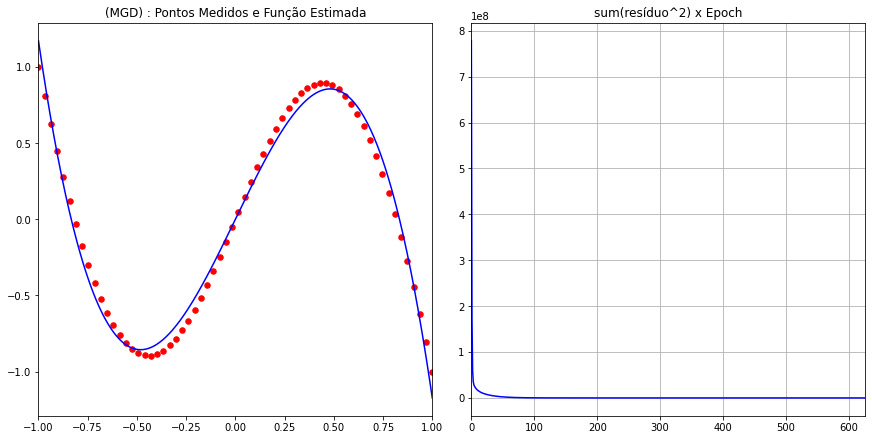

In [ ]:
#from _typeshed import NoneType

class MGD_pol3: 

    def __init__(self, lr=0.1, niter=1000, coefs=(1.,1.,1.,1.)):
      self.lr=lr
      self.niter=niter
      self.coefs = np.array(coefs,dtype=np.float32)
      self.erros = list()


    def predict(self, X):
      return self.coefs[0] + self.coefs[1]*X + self.coefs[2]*X**2 + self.coefs[3]*X**3


    def loss(self, y, y_pred=None, X=None):

      assert y_pred is not None or X is not None, "y_pred ou X devem ser passados como parâmetros"

      if y_pred is not None:
        err = np.sum( (y_pred-y)**2) 
      else:
        err = np.sum((self.predict(X)-y)**2)
      return err


    def gradient(self, X, y, y_pred):
      grads = np.ones(4, dtype=np.float32)
      residue=y_pred-y
      grads[0] = 2*np.sum(residue)
      grads[1] = 2*np.sum(residue*X)
      grads[2] = 2*np.sum(residue*X**2)
      grads[3] = 2*np.sum(residue*X**3)
      return grads


    def fit(self, X, y):

      DELTA = 0.000001       #criterio de parada de convergência

      #forward
      y_pred = self.predict(X)

      #calcula erro
      erro = self.loss(y,y_pred=y_pred)
      erro_anterior = erro + erro*DELTA*2.  #inicializa o erro anterior

      for i in np.arange(0,self.niter):

        #verificar criterio de parada
        if np.abs(erro-erro_anterior) < np.abs(erro) * DELTA:
          Utils.printMessage(f"Algoritmo CONVERGIU na iteração {i} de {self.niter}! Parâmetros foram atualizados com sucesso!")
          return True, erro
          
        if erro > erro_anterior:
          Utils.printMessage(f"Algoritmo não convergiu na iteração {i} de {self.niter}! Laço será abortado! err={erro}, err_anterior={erro_anterior}")
          return False, erro
        
        
        #avaliar o gradiente na posição corrente (coefs)
        grads = self.gradient(X, y, y_pred)

        #alterar a posição corrente em função da taxa de aprendizado e dos gradientes
        self.coefs = self.coefs - grads*self.lr

        #forward
        y_pred = self.predict(X)

        #calcula erro
        erro_anterior = erro
        erro = self.loss(y,y_pred=y_pred)
        self.erros.append(erro)

        if i % (self.niter/20) == 0:
          print(f"[ EPOCH {i} ] erro = {erro} --- coefs = [ {self.coefs} ]") 

      Utils.printMessage(f"Laço de {self.niter} iterações chegou ao fim!")
      return True, erro



MAX_RANDOM=10000.


#gera dado a ser aproximado
X = np.linspace(-1,1,64)
y = f_orig(X)

# aloca objeto que implementa a regressão
coefs=(np.random.random()*MAX_RANDOM,np.random.random()*MAX_RANDOM,np.random.random()*MAX_RANDOM,np.random.random()*MAX_RANDOM)
print("coefs aleatórios = ", coefs )
regressor = MGD_pol3(lr=0.01, coefs=coefs, niter=2000)
convergiu, err = regressor.fit(X,y)

#treinamento online (batchs)
#for i in np.arange(0,10):
#  convergiu, err = regressor.fit(X[0::4],y[0::4])
#  convergiu, err = regressor.fit(X[1::4],y[1::4])
#  convergiu, err = regressor.fit(X[2::4],y[2::4])
#  convergiu, err = regressor.fit(X[3::4],y[3::4])


#treinamento online (batchs)
#for i in np.arange(0,10):
#  convergiu, err = regressor.fit(X[0:16],y[0:16])
#  convergiu, err = regressor.fit(X[16:32],y[16:32])
#  convergiu, err = regressor.fit(X[32:48],y[32::48])
#  convergiu, err = regressor.fit(X[48:64],y[48:64])

a=regressor.coefs[0]
b=regressor.coefs[1]
c=regressor.coefs[2]
d=regressor.coefs[3]
Utils.printMessage(f"[ CONVERGIU?  ]   {convergiu}")
Utils.printMessage(f"[ ERRO  ]         {err}")
Utils.printMessage(f"[ COEFICIENTES ]  a={a:.2f}, b={b:.2f}, c={c:.2f}, d={d:.2f}")
Utils.printMessage(f"[ POLINÔMIO ]     {a:.2f} + ({b:.2f} * x) + ({c:.2f} * x^2) + ({d:.2f} * x^3)")

X_denso = np.linspace(-1,1,512)
y_pred = mmq.f(X_denso, a, b, c, d)

epochs = np.arange(0,len(regressor.erros))

fig = plt.figure(figsize=(Utils.PLOT_SX*2,Utils.PLOT_SY), constrained_layout=True)
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax1.scatter(X, y, color='r', marker='o', s=30) 
Utils.drawFunction_grid(ax1, X_denso, y_pred, cores='b')
ax1.set_title("(MGD) : Pontos Medidos e Função Estimada")
Utils.drawFunction_grid(ax2, epochs, np.array(regressor.erros), cores='b')
ax2.set_title("sum(resíduo^2) x Epoch" )
plt.grid(True)
plt.show()




---
#**Método Gradiente Descendente com Pytorch**

Essa seção visa implementar MGD através do *framework* Pytorch. 


O Pytorch possui a funcionalidade denominada "**autograd**", que realiza o cálculo automático do gradiente de qualquer operação *simple*s realizada sobre um determinado conjunto de variáveis. O autograd mantém o rastreio de todas as operações simples (e de seus respectivos gradientes) realizadas em sequência a partir do conjunto de variáveis inicial. No contexto do gradiente descendente, essas variáveis representam os hyper-parâmetros de algum modelo matemático que está sendo ajustado.
 


Outra funcionalidade é a "**backpropagation**", que permite avaliar o valor do gradiente total da função erro em determinado ponto, utilizando para isso os gradientes intermediários de cada operação que são gerados pelo autograd e aplicando a regra da cadeia.

 
---
##**Função original**

$$y = \sin(\pi*x) - x^3$$


---
##**Função de aproximação**

$$y' = a + bx + cx^2 + dx^3$$

---
##**Função a ser minimizada** 

$$Erro(a,b,c,d) = \sum_{i=1}^n(y_i-y_i')^2 = \sum_{i=1}^n(y_i'-y_i)^2 = \sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)^2$$



tensor([2696.2859, 7541.0186, 8076.1353, 8215.0732], requires_grad=True)
[ EPOCH 0 ] erro = 1133454208.0 --- coefs = [ tensor([-4310.1689,  1983.5264,  4689.0718,  4512.4521], requires_grad=True) ]
[ EPOCH 100 ] erro = 82081.8203125 --- coefs = [ tensor([-2.4709e-02, -1.4391e+02,  6.5835e-02,  2.2073e+02],
       requires_grad=True) ]
[ EPOCH 200 ] erro = 810.4736938476562 --- coefs = [ tensor([-1.7093e-07, -1.1893e+01,  9.1517e-07,  1.8469e+01],
       requires_grad=True) ]
[ EPOCH 300 ] erro = 8.31360912322998 --- coefs = [ tensor([-6.4251e-09,  1.2224e+00,  7.9905e-09, -1.6255e+00],
       requires_grad=True) ]
[ EPOCH 400 ] erro = 0.3961668908596039 --- coefs = [ tensor([ 8.7646e-10,  2.5254e+00,  1.5534e-08, -3.6219e+00],
       requires_grad=True) ]
[ EPOCH 500 ] erro = 0.31802040338516235 --- coefs = [ tensor([-1.3587e-09,  2.6549e+00,  1.7769e-08, -3.8202e+00],
       requires_grad=True) ]
---------------------------------------------------
Algoritmo CONVERGIU na iteração 596 d

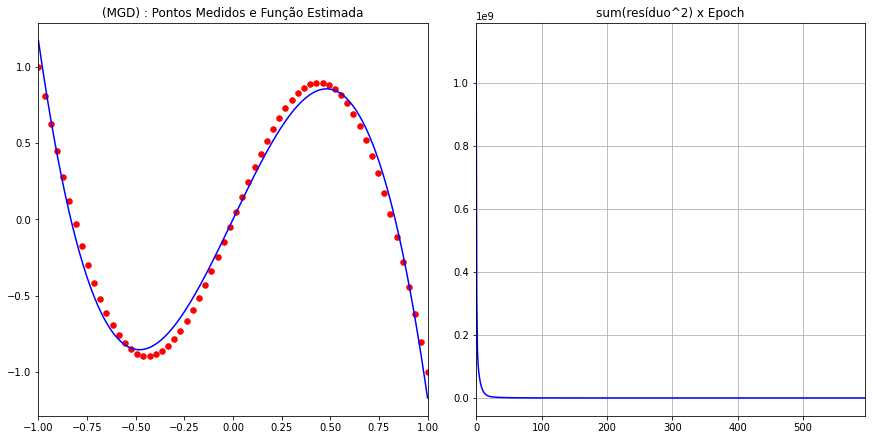

In [ ]:
import torch

#from _typeshed import NoneType

class MGD_pol3_pytorch: 

    def __init__(self, lr=0.1, niter=1000, coefs=(1.,1.,1.,1.)):
      self.lr=lr
      self.niter=niter
      self.coefs = torch.tensor(coefs,dtype=torch.float32,requires_grad=True)
      print(self.coefs)
      self.erros = list()


    def forward(self, X):
      #assert X is torch.tensor, "Vetor de entrada X deve ser um tensor!"
      return self.coefs[0] + self.coefs[1]*X + self.coefs[2]*X**2 + self.coefs[3]*X**3


    def loss(self, y, y_pred=None, X=None):

      assert y_pred is not None or X is not None, "y_pred ou X devem ser passados como parâmetros"

      #assert X is None or X is torch.tensor, "Vetor de entrada X deve ser um tensor!"
      #assert y_pred is None or y_pred is torch.tensor, "Vetor de entrada com as previsões y_pred deve ser um tensor!"
      #assert y is torch.tensor, "Vetor de entrada y deve ser um tensor!"

      if y_pred is not None:
        err = ((y_pred-y)**2).sum()
      else:
        err = ((self.forward(X)-y)**2).sum()
      return err


    def backward(self, erro):
      erro.backward()


    def fit(self, X, y):
      assert type(X) is torch.Tensor and type(y) is torch.Tensor, "Vetores de entrada X e y devem ser tensores!"

      DELTA = 0.000001       #criterio de parada de convergência
      erro_anterior = None  #criterio de parada de NÃO convergência
      erro = None


      #forward e cálculo do erro
      #obs.: a funcionalidade autograd do pytorch é responsável por saber como calcular 
      #o gradiente da função loss em função dos parâmetros do modelo
      erro = self.loss(y,X=X)
      erro_anterior = erro + erro*DELTA*2.  #inicializa o erro anterior

      for i in np.arange(0,self.niter):

        #verificar criterio de parada
        if (erro-erro_anterior).abs() < erro.abs() * DELTA:
          Utils.printMessage(f"Algoritmo CONVERGIU na iteração {i} de {self.niter}! Parâmetros foram atualizados com sucesso!")
          return True, erro
          
        if erro > erro_anterior:
          Utils.printMessage(f"Algoritmo não convergiu na iteração {i} de {self.niter}! Laço será abortado! err={erro}, err_anterior={erro_anterior}")
          return False, erro
        
        #avaliar o gradiente na posição corrente (coefs)
        erro.backward()

        with torch.no_grad(): 
          #alterar a posição corrente em função da taxa de aprendizado e dos gradientes
          self.coefs -= self.coefs.grad * self.lr

        self.coefs.grad.zero_()
        #for g in self.coefs:
        #  g.grad.zero_()

        #forward e cálculo do erro
        erro_anterior = erro
        erro = self.loss(y,X=X)
        self.erros.append(float(erro))

        if i % (self.niter/20) == 0:
          print(f"[ EPOCH {i} ] erro = {erro} --- coefs = [ {self.coefs} ]") 

      Utils.printMessage(f"Laço de {self.niter} iterações chegou ao fim!")
      return True, erro


def f_orig_tensor(X):
  return torch.sin(torch.pi*X) - X**3
  #return 3*X + 0.1*X**3






#gera dado a ser fitado
X = torch.tensor(np.linspace(-1,1,64), dtype=torch.float32)
y = f_orig_tensor(X)


#aloca objeto que implementa o regressor
regressor = MGD_pol3_pytorch(lr=0.01, coefs=coefs, niter=2000)

#efetua a regressão pelo método de gradiente descendente, utilizando pytorch
convergiu, err = regressor.fit(X,y)

#imprime informações 
a=regressor.coefs[0]
b=regressor.coefs[1]
c=regressor.coefs[2]
d=regressor.coefs[3]
Utils.printMessage(f"[ CONVERGIU?  ]   {convergiu}")
Utils.printMessage(f"[ ERRO  ]         {err}")
Utils.printMessage(f"[ COEFICIENTES ]  a={a:.2f}, b={b:.2f}, c={c:.2f}, d={d:.2f}")
Utils.printMessage(f"[ POLINÔMIO ]     {a:.2f} + ({b:.2f} * x) + ({c:.2f} * x^2) + ({d:.2f} * x^3)")


#desenha gráficos com os resultados

X_denso = torch.tensor(np.linspace(-1,1,512))
#y_pred = mmq.f(X_denso, a, b, c, d)
y_pred = regressor.forward(X_denso) #, a.detach().numpy(), b.detach().numpy(), c.detach().numpy(), d.detach().numpy() )

epochs = np.arange(0,len(regressor.erros))

fig = plt.figure(figsize=(Utils.PLOT_SX*2,Utils.PLOT_SY), constrained_layout=True)
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax1.scatter(X, y, color='r', marker='o', s=30) 
Utils.drawFunction_grid(ax1, X_denso.detach().numpy(), y_pred.detach().numpy(), cores='b')
ax1.set_title("(MGD) : Pontos Medidos e Função Estimada")
Utils.drawFunction_grid(ax2, epochs, np.array(regressor.erros), cores='b')
ax2.set_title("sum(resíduo^2) x Epoch" )
plt.grid(True)
plt.show()



---
#**Observações Finais**

Foram implementadas 3 formas distintas de ajuste de funções por polinômios: 

 1. métodos dos mínimos quadrados, 
 1. método do gradiente descendente e 
 1. método do gradiente descendente por backpropagation.


O método 1) provê a melhor solução possível para o ajuste, segundo a métrica de erro de mínimos quadrados, sendo, portanto, o gabarito a ser alcançado. Os métodos 2) e 3) são iterativos e, idealmente, deveriam produzir ou se aproximar muito da solução obtida em 1). 


Para exemplificar o uso dos métodos, escolheram-se pontos de partida gerados pela função $$y = \sin(\pi*x) - x^3; x \in [-1,1]$$ e escolheu-se um polinômio de grau 3 como a função de aproximação: $$y' = a + bx + cx^2 + dx^3$$. A medida de erro utilizada como critério para o ajuste foi $$Erro(a,b,c,d) = \sum_{i=1}^n(y_i-y_i')^2 = \sum_{i=1}^n(y_i'-y_i)^2 = \sum_{i=1}^n(a+bx_i+cx_i^2+dx_i^3-y_i)^2$$


Os métodos 2) e 3) convergiram para a solução 1) em aproxidamente 500 iterações, com parâmetros inicializados randomicamente e com uma taxa de aprendizado de 0.01.

#Footnotes

<a name="footnote-1"></a>1. [^](#footref-1) A more precise statistical approach to define the function which represents the observed behaviour has to consider an random error associated to the observation. We suggest reading "*An Introduction to Statistical Learning - Chapter 2 - by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani*".